Autômato para simular um controlador de alerta de um sistema que pode apresentar falhas, por exemplo uma quantidade inaceitável de erros de uma API num certo intervalo de tempo

In [5]:
!pip install automathon --upgrade

  Preparing metadata (setup.py) ... done
  Created wheel for automathon: filename=automathon-0.0.13-py3-none-any.whl size=18929 sha256=3da9f5c711aab52914cdf57551dc9b4acde2fbcb6c1c703e9676f41d17347f32
  Stored in directory: /root/.cache/pip/wheels/2d/e7/9e/3e4d1e29780df3f61ea8b890b1be00a0f8d4a021139f927dd6
Successfully built automathon
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3


In [31]:
from automathon import DFA
from IPython import display

### Construindo o autômato

In [9]:
Q = {'ok', 'pending1', 'pending2', 'no_data', 'error', 'alert'}
sigma = {'s', 'f', 'n', 'e'}
delta = { 'ok':       {'s': 'ok', 'f': 'pending1', 'n': 'no_data', 'e': 'error'},
          'pending1': {'s': 'ok', 'f': 'pending2', 'n': 'no_data', 'e': 'error'},
          'pending2': {'s': 'ok', 'f': 'alert',    'n': 'no_data', 'e': 'error'},
          'no_data':  {'s': 'ok', 'f': 'pending1', 'n': 'no_data', 'e': 'error'},
          'error':    {'s': 'ok', 'f': 'pending1', 'n': 'no_data', 'e': 'error'},
          'alert':    {'s': 'ok', 'f': 'error',    'n': 'no_data', 'e': 'error'}
        }
initial_state = 'ok'
F = {'ok', 'alert', 'no_data', 'error'}

automata = DFA(Q, sigma, delta, initial_state, F)

### Validando

In [21]:
automata.is_valid()

True

In [11]:
automata.accept("s")

True

In [12]:
automata.accept("sf")

False

In [13]:
automata.accept("sff")

False

In [14]:
automata.accept("sfff")

True

In [15]:
automata.accept("sfffe")

True

In [16]:
automata.accept("sfffen")

True

### Visualizando o autômato

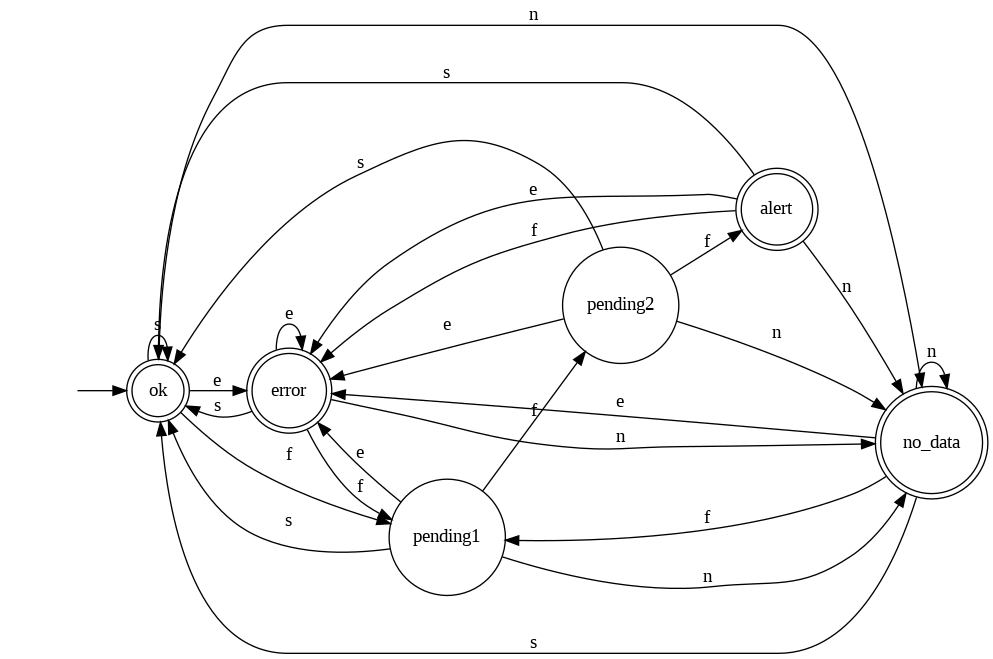

In [27]:
automata.view("afd01")
display.Image("/content/afd01.gv.png")

### Versão NFA
O NFA resulta no mesmo autômato

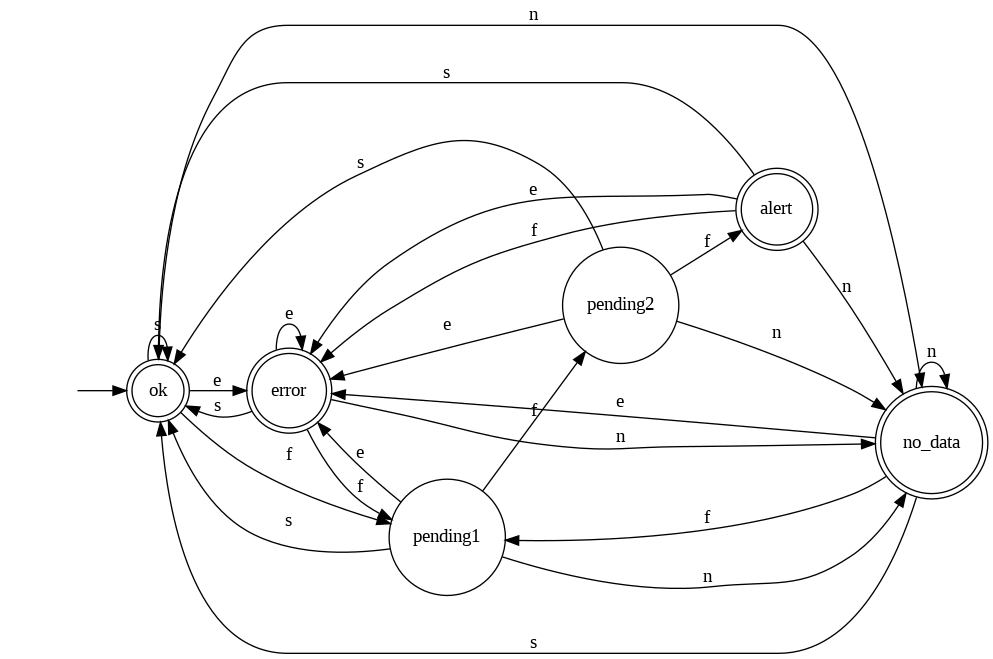

In [30]:
automata_nfa = automata.get_nfa()
automata.view("afd01_nfa")
display.Image("/content/afd01_nfa.gv.png")

### Minimização

O autômato já é mínimo, portanto a operação de minimização retorna o mesmo autômato

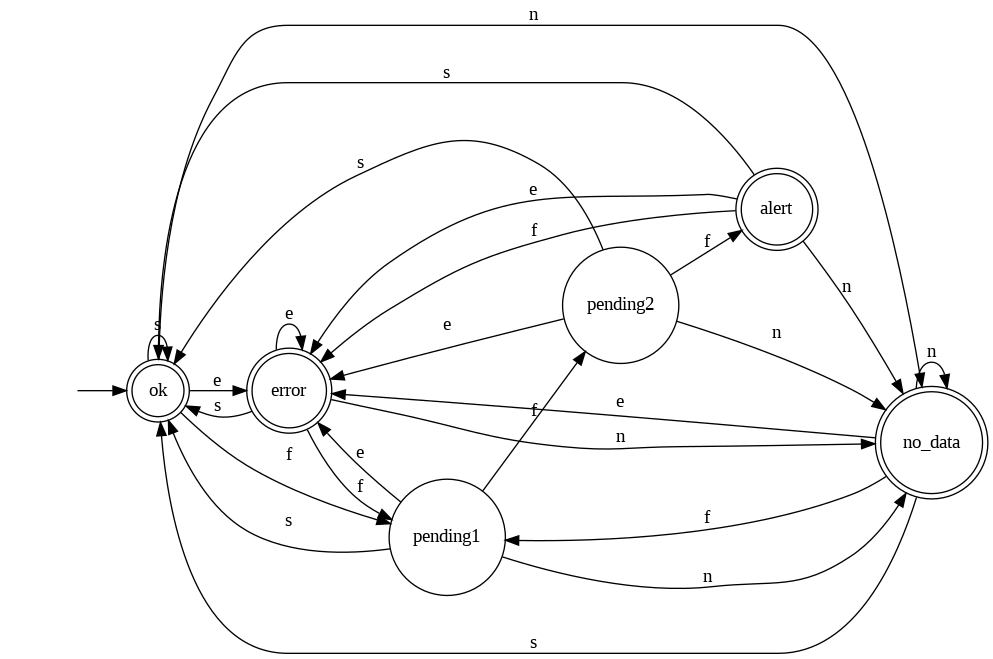

In [34]:
automata_min = automata_nfa.minimize()
automata.view("afd01_nfa_min")
display.Image("/content/afd01_nfa_min.gv.png")